### [ 참고 ] 

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

###  UCI 저장소에서 제공하는 피마인디언 데이타

- 1950년대까지 비만인이 없던 피마인디언 부족

- 그러나 페스트푸드 문화와 더불어 지금은 전체 부족의 60%가 당뇨이고 80%가 비만이다


- 샘플수(레코드) : 768
- 속성 : 8
        - 정보1 (pregnant) : 과거 임신 횟수
        - 정보2 (plasma) : 포도당 부하 검사 2시간 후 공복 혈당 농도 (mm Hg)
        - 정보3 (pressure) : 혈압(mm Hg)
        - 정보4 (thickness) :삼두근 피부 주름 두께(mm)
        - 정보5 (insulin) : 혈청 인슐린 (2hour, mu U/ml)
        - 정보6 (BMI) : 체질량지수  weight(kg)/(height(m)*height(m))
        - 정보7 (pedigree) : 당뇨병 가족력
        - 정보8 (age) : 나이
        
- 클래스 : 당뇨 (1:당뇨 / 0:당뇨아님)      


In [8]:
# (1) 데이타셋 로딩
#      pima-indians-diabetes.csv 파일을 데이타프레임으로 로딩하면서 컬럼명도 지정

import pandas as pd

df = pd.read_csv('./data/pima-indians-diabetes.csv')
df

df = pd.read_csv('./data/pima-indians-diabetes.csv', names=['pregnant','plasma','pressure','thickness',
                                                                'insulin','BMI','pedigree','age','diabetes'])
#csv 파일로 읽을때 제목이 없는 경우가 있는데 판다스 내에 있는 함수로 행들의 제목들을 정해줄 수 있다.
df

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
# (2) 정보 확인
df.shape #레코드와 행이 몇개가 존재하는지 알려준다.
df.info() #데이터들의 값들이 어떤 데이터 형식인지 알려준다.
df.describe #데이터들의 통계적 값들을 보여준다.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<bound method NDFrame.describe of      pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  \
0           6     148        72         35        0  33.6     0.627   50   
1           1      85        66         29        0  26.6     0.351   31   
2           8     183        64          0        0  23.3     0.672   32   
3           1      89        66         23       94  28.1     0.167   21   
4           0     137        40         35      168  43.1     2.288   33   
..        ...     ...       ...        ...      ...   ...       ...  ...   
763        10     101        76         48      180  32.9     0.171   63   
764         2     122        70         27        0  36.8     0.340   27   
765         5     121        72         23      112  26.2     0.245   30   
766         1     126        60          0        0  30.1     0.349   47   
767         1      93        70         31        0  30.4     0.315   23   

     diabetes  
0           1  
1           0  
2    

## [연습]  임신횟수(pregnant)당 당뇨병 발생(diabetes) 확률을 구한다


In [11]:
#2개의 컬럼만 출력을 하고 싶을때

In [15]:
temp = df[["pregnant","diabetes"]]
print(temp)

     pregnant  diabetes
0           6         1
1           1         0
2           8         1
3           1         0
4           0         1
..        ...       ...
763        10         0
764         2         0
765         5         0
766         1         1
767         1         0

[768 rows x 2 columns]


그냥 출력해도 되고 변수를 잡아서 출력을 해도 되고  
이것은 취향이나 습관의 차이

In [23]:
temp_count=temp["pregnant"].value_counts()
temp_count

pregnant
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [26]:
temp2 = temp.groupby("pregnant").sum()
print(temp2)
print("-"*50)
temp3 = temp.groupby("pregnant").mean()
print(temp3)

          diabetes
pregnant          
0               38
1               29
2               19
3               27
4               23
5               21
6               16
7               25
8               22
9               18
10              10
11               7
12               4
13               5
14               2
15               1
17               1
--------------------------------------------------
          diabetes
pregnant          
0         0.342342
1         0.214815
2         0.184466
3         0.360000
4         0.338235
5         0.368421
6         0.320000
7         0.555556
8         0.578947
9         0.642857
10        0.416667
11        0.636364
12        0.444444
13        0.500000
14        1.000000
15        1.000000
17        1.000000


<Axes: xlabel='pregnant'>

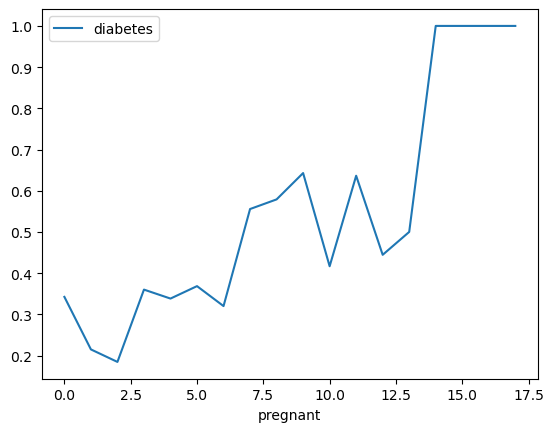

In [28]:
temp3.plot()

이 통계 데이터는 잘못된 통계데이터다.  
12명이상 임신을 한 사람들은 1명씩만 있는데  
다 당뇨에 걸린것으로 되기 때문에  
각각의 표본의 설정이 잘못되었기 떄문

[ 분석 ]  임신횟수가 14번 이상이면 당뇨병에 걸릴 확률이 100%인가? 

임신횟수가 14번 이상인 경우가 몇 건 없는데 당뇨병이라고 하여 이를 확정할 수 있나???`0

적어도 집단의 비율이 동일해야 예를 들어

1 ~ 3명 / 4 ~ 6명 / 7 ~ 9명 / 10 ~ 12명 / 13 ~ 이상명을 임신횟수를 가진 사람들을 각 집단에 100명씩 조사한 결과라던가 

[ 추가 고민 ] 임신횟수별 인원수를 구해서 나누면 되지 않을까나